# Task-2 Golden Task: Speeech emotion Recognition

In [128]:
!pip3 install librosa

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

In [129]:
import glob

base_path = "D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data"
file_pattern = os.path.join(base_path, '**', '*.*')

paths = []
labels = []

for filepath in glob.glob(file_pattern, recursive=True):
    filename = os.path.basename(filepath)
    label = filename.split('_')[-1].split('.')[0].lower()
    paths.append(filepath)
    labels.append(label)

    if len(paths) == 2800:
        break

print('Dataset is Loaded')


Dataset is Loaded


In [130]:
len(paths)

2800

In [131]:
paths[:5]

['D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [132]:
labels

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',


In [133]:

data = {'Speech': paths, 'Label': labels}
df = pd.DataFrame(data)
df.head()


,Speech,Label
0,D:\Codercave Sep 2023\speech\archive\TESS Toro...,angry
1,D:\Codercave Sep 2023\speech\archive\TESS Toro...,angry
2,D:\Codercave Sep 2023\speech\archive\TESS Toro...,angry
3,D:\Codercave Sep 2023\speech\archive\TESS Toro...,angry
4,D:\Codercave Sep 2023\speech\archive\TESS Toro...,angry


In [134]:
from collections import Counter

label_counts = Counter(df['Label'])
label_counts


Counter({'angry': 400,
         'disgust': 400,
         'fear': 400,
         'happy': 400,
         'neutral': 400,
         'ps': 400,
         'sad': 400})

In [135]:
import librosa
import IPython.display as ipd

# Define the file path
file_path_fear = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_Fear\\OAF_bath_fear.wav'
file_path_angry = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav'
file_path_disgust = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_disgust\\OAF_bath_disgust.wav'
file_path_happy = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_bath_happy.wav'
file_path_neutral = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_neutral\\OAF_bath_neutral.wav'
file_path_ps = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_Pleasant_surprise\\OAF_bath_ps.wav'
file_path_sad = 'D:\\Codercave Sep 2023\\speech\\archive\\TESS Toronto emotional speech set data\\OAF_sad\\OAF_bath_sad.wav' 

# Load the audio file and get the sampling rate
data_fear, sampling_rate_fear = librosa.load(file_path_fear)
data_angry, sampling_rate_angry = librosa.load(file_path_angry)
data_disgust, sampling_rate_disgust = librosa.load(file_path_disgust)
data_happy, sampling_rate_happy = librosa.load(file_path_happy)
data_neutral, sampling_rate_neutral = librosa.load(file_path_neutral)
data_ps, sampling_rate_ps = librosa.load(file_path_ps)
data_sad, sampling_rate_sad = librosa.load(file_path_sad)

# Play the audio
ipd.Audio(data_fear, rate=sampling_rate_fear)


In [136]:
# Play the audio
ipd.Audio(data_angry, rate=sampling_rate_angry)

In [137]:
# Play the audio
ipd.Audio(data_disgust, rate=sampling_rate_disgust)

In [138]:
# Play the audio
ipd.Audio(data_happy, rate=sampling_rate_happy)

In [139]:
# Play the audio
ipd.Audio(data_angry, rate=sampling_rate_angry)

In [140]:
# Play the audio
ipd.Audio(data_neutral, rate=sampling_rate_neutral)

In [141]:
# Play the audio
ipd.Audio(data_ps, rate=sampling_rate_ps)

In [142]:
# Play the audio
ipd.Audio(data_sad, rate=sampling_rate_sad)

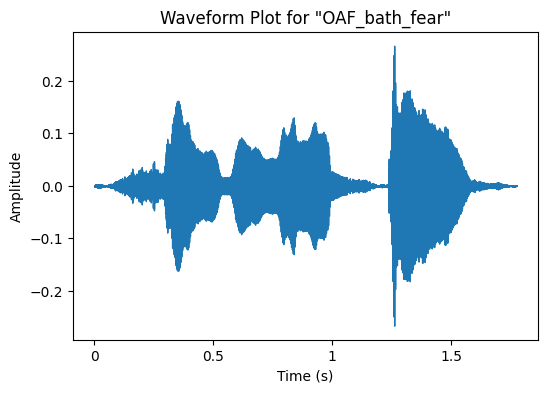

In [143]:

# Create a figure with a specific size
plt.figure(figsize=(6, 4))

# Display the waveform
librosa.display.waveshow(data_fear, sr=sampling_rate_fear)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform Plot for "OAF_bath_fear"')

# Show the plot
plt.show()


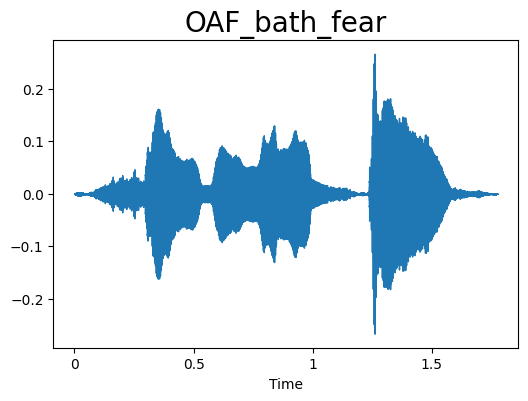

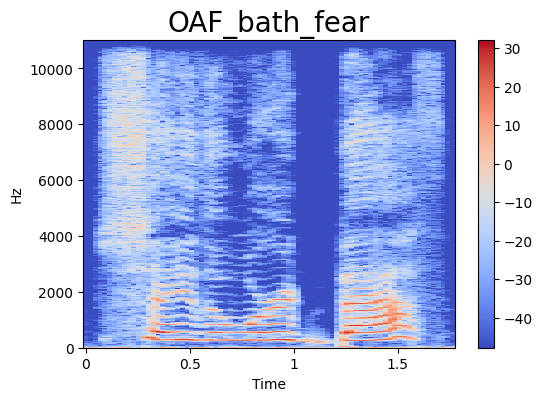

In [144]:

def waveplot(data, sr, emotion):
    plt.figure(figsize=(6, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(6, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

waveplot(data_fear, sampling_rate_fear, 'OAF_bath_fear')
spectrogram(data_fear, sampling_rate_fear, 'OAF_bath_fear')


In [145]:
def feature_extract_mfcc(filename, duration=3, offset=0.5, n_mfcc=40):
    # Load the audio file
    y, sr = librosa.load(filename, duration=duration, offset=offset)

    # Extract MFCC features and calculate the mean along the time axis
    mfcc_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mean_mfcc = np.mean(mfcc_features, axis=1)

    return mean_mfcc
    
# Assuming df['speech'][0] contains the file path
audio_file_path = df['Speech'][0]
mfcc_features = feature_extract_mfcc(audio_file_path)
mfcc_features

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [146]:

# Create an empty list to store the MFCC features
mfcc_features_list = []

# Loop through the 'Speech' column and apply the function
for audio_file_path in df['Speech']:
    mfcc_features = feature_extract_mfcc(audio_file_path)
    mfcc_features_list.append(mfcc_features)

# Create a new DataFrame from the list of MFCC features
MFCC = pd.DataFrame(mfcc_features_list)

# Optionally, you can set meaningful column names if needed
# For example, if you want to name the columns MFCC_0, MFCC_1, etc.
MFCC.columns = [f'MFCC_{i}' for i in range(len(MFCC.columns))]

MFCC

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MFCC_30,MFCC_31,MFCC_32,MFCC_33,MFCC_34,MFCC_35,MFCC_36,MFCC_37,MFCC_38,MFCC_39
0,-396.986206,77.440536,-19.592791,-21.666689,-2.112755,10.075363,-20.366707,-6.092449,-7.212283,-0.557366,...,0.394722,5.111315,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313923,2.089150,-1.906491
1,-465.732666,98.773727,0.656009,-32.745441,-11.261922,12.688793,-1.167536,-3.411587,-10.514169,4.303145,...,3.330463,8.743922,12.142041,2.990747,2.109897,-2.387535,2.027314,8.680707,4.173659,3.258969
2,-429.791962,46.124001,1.555048,-0.217095,2.611192,0.261025,-13.608225,-4.617732,-10.552830,-0.900518,...,5.427892,10.240539,11.046001,-3.844760,-4.962565,4.128690,5.171259,8.633682,-2.422828,-2.346131
3,-403.461182,76.323692,-12.531774,-22.288858,-2.958806,6.478218,-15.486897,-6.701817,-10.411971,-2.644109,...,1.078772,6.671562,8.910459,8.015787,5.206865,0.620396,2.875755,6.803400,4.877169,5.968113
4,-434.057556,77.445503,10.865500,16.092943,8.049629,1.842174,-22.560184,8.322239,-17.183247,-15.766746,...,4.044577,6.132054,2.540642,0.422906,0.889001,1.261948,3.691584,3.237996,-1.956307,1.291644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-553.220093,89.835770,27.215466,16.407124,19.363092,7.666645,-12.079962,-14.381937,-15.362858,3.879979,...,8.696483,16.642265,8.439514,13.415040,7.307657,6.183744,11.409671,21.720272,12.983924,12.237135
2796,-589.236755,96.204079,36.961182,15.014448,28.633459,15.331487,-11.882653,-17.149677,-14.525677,10.376968,...,10.007030,14.549020,13.196979,6.829803,7.700461,10.550093,12.148675,17.724789,11.220434,12.256853
2797,-533.418152,85.432419,27.791998,19.307178,22.362871,6.963135,-4.478489,-14.119821,-9.435639,2.282585,...,6.298314,11.529120,4.696131,3.490446,4.090009,9.238066,12.704899,14.300142,9.150183,7.926145
2798,-548.614197,110.164238,31.910236,12.572517,22.315897,10.967988,-6.995991,-15.674176,-19.667948,2.580059,...,1.162765,8.887734,-0.502233,6.346200,6.041375,9.007749,14.687617,25.414341,19.939392,22.088249


In [147]:
len(MFCC)

2800

In [148]:
x = MFCC.to_numpy()
x.shape


(2800, 40)

In [149]:

# One-hot encode the 'label' column using pandas.get_dummies
y = pd.get_dummies(df['Label'])

# Convert the one-hot encoded DataFrame to a NumPy array
y = y.to_numpy()
y


array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [150]:
y.shape

(2800, 7)

In [151]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(30)

# Calculate the number of samples for the training set
train_size = int(0.8 * X.shape[0])

# Shuffle the indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Split the indices into training and testing sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Use the indices to create the training and testing sets
x_train = X[train_indices]
x_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]


In [152]:
x_train


array([[-531.54425  ,   92.32766  ,   26.670822 , ...,   13.113003 ,
          12.583034 ,   12.825192 ],
       [-492.50412  ,   82.9032   ,   20.158035 , ...,    8.099399 ,
          11.260306 ,   11.965907 ],
       [-493.0798   ,  111.24267  ,   19.864489 , ...,   45.425236 ,
          30.669868 ,   18.54933  ],
       ...,
       [-417.66312  ,   70.11549  ,  -24.220459 , ...,   10.373228 ,
           1.0537221,    1.2641289],
       [-461.2538   ,   56.513596 ,   13.970669 , ...,   -2.0461364,
          -6.0635524,    3.19893  ],
       [-434.17892  ,   81.906334 ,  -16.425224 , ...,    2.6042042,
          -4.404284 ,    2.731867 ]], dtype=float32)

In [153]:
x_test


array([[-4.9313364e+02,  9.3543152e+01,  1.9678150e+01, ...,
         5.8169098e+00,  8.3860903e+00,  1.2963233e+01],
       [-4.1770340e+02,  1.1075615e+02,  2.8642011e+00, ...,
         1.3276829e+01,  9.1135368e+00,  8.4296856e+00],
       [-4.5627963e+02,  1.0571221e+02,  3.0716792e-01, ...,
         5.2106948e+00,  6.3561177e+00,  9.1437874e+00],
       ...,
       [-4.6800412e+02,  1.0284443e+02,  1.1229274e+01, ...,
        -6.5714681e-01, -8.1355753e+00,  4.8283362e+00],
       [-4.5840732e+02,  4.9866203e+01,  4.9185877e+00, ...,
         2.0187433e+00, -2.6969130e+00,  6.8953329e-01],
       [-4.8881857e+02,  6.2077583e+01,  1.9631453e+01, ...,
         6.5589213e-01, -3.6089084e+00,  5.0445032e+00]], dtype=float32)

In [154]:
y_train


array([[False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [155]:
y_test

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [156]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense

# Define the input layer
input_layer = Input(shape=(40, 1))

# LSTM layer with 256 units
lstm_layer = LSTM(256, return_sequences=False)(input_layer)

# Dropout layer with a dropout rate of 0.2
dropout_layer1 = Dropout(0.2)(lstm_layer)

# Dense layer with 128 units and ReLU activation
dense_layer1 = Dense(128, activation='relu')(dropout_layer1)

# Dropout layer with a dropout rate of 0.2
dropout_layer2 = Dropout(0.2)(dense_layer1)

# Dense layer with 64 units and ReLU activation
dense_layer2 = Dense(64, activation='relu')(dropout_layer2)

# Dropout layer with a dropout rate of 0.2
dropout_layer3 = Dropout(0.2)(dense_layer2)

# Output layer with 7 units and softmax activation
output_layer = Dense(7, activation='softmax')(dropout_layer3)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0   

In [157]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 [==============================] - 27s 536ms/step - loss: 1.2374 - accuracy: 0.5167 - val_loss: 0.6948 - val_accuracy: 0.7232
Epoch 2/50
28/28 [==============================] - 11s 386ms/step - loss: 0.5347 - accuracy: 0.7919 - val_loss: 0.2833 - val_accuracy: 0.9040
Epoch 3/50
28/28 [==============================] - 11s 386ms/step - loss: 0.2383 - accuracy: 0.9247 - val_loss: 0.1293 - val_accuracy: 0.9509
Epoch 4/50
28/28 [==============================] - 11s 399ms/step - loss: 0.1612 - accuracy: 0.9459 - val_loss: 0.1897 - val_accuracy: 0.9308
Epoch 5/50
28/28 [==============================] - 11s 376ms/step - loss: 0.1348 - accuracy: 0.9581 - val_loss: 0.1066 - val_accuracy: 0.9688
Epoch 6/50
28/28 [==============================] - 11s 395ms/step - loss: 0.1212 - accuracy: 0.9626 - val_loss: 0.0968 - val_accuracy: 0.9688
Epoch 7/50
28/28 [==============================] - 8s 289ms/step - loss: 0.1148 - accuracy: 0.9637 - val_loss: 0.0824 - val_accuracy: 0.9777


In [158]:

# Assuming you have 'history' available
val_accuracy = history.history['val_accuracy']

# Find the index of the epoch with the highest validation accuracy
best_epoch_index = np.argmax(val_accuracy)

# Get the best validation accuracy value
best_val_accuracy = val_accuracy[best_epoch_index]

# Print the best validation accuracy value and the corresponding epoch
print(f'Best Validation Accuracy: {best_val_accuracy:.4f} at Epoch {best_epoch_index + 1}')


Best Validation Accuracy: 0.9978 at Epoch 40


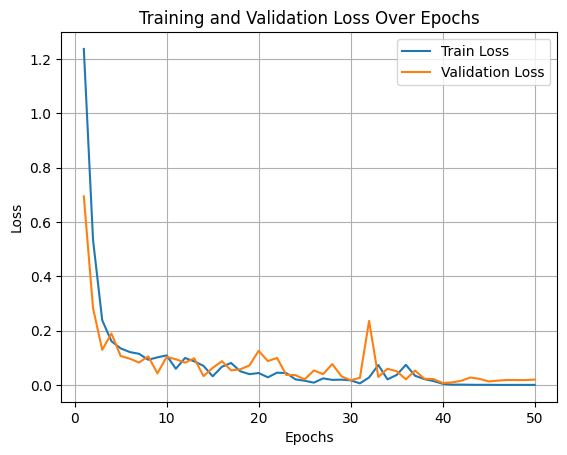

In [159]:

def plot_loss_line(history):
    epochs = range(1, len(history.history['loss']) + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Over Epochs')
    plt.grid(True)
    plt.show()

# Assuming you have already trained your model and have 'history' available
plot_loss_line(history)
